In [1]:
#import nessesary libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the data
df = pd.read_csv("Churn.csv");

In [3]:
#view the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.size

140000

In [6]:
#check for null values
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

**No null Values found**

In [7]:
#checking for outliers
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    mean = df[col].mean()
    std_dev = df[col].std()
    outliers = df[(df[col] < mean - 3 * std_dev) | (df[col] > mean + 3 * std_dev)]
    print(f"Outliers in {col}: {len(outliers)}")


Outliers in RowNumber: 0
Outliers in CustomerId: 0
Outliers in CreditScore: 8
Outliers in Age: 133
Outliers in Tenure: 0
Outliers in Balance: 0
Outliers in NumOfProducts: 60
Outliers in HasCrCard: 0
Outliers in IsActiveMember: 0
Outliers in EstimatedSalary: 0
Outliers in Exited: 0


In [10]:
df["Age"].max()

92

In [8]:
#check for duplicate rows
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


<Axes: xlabel='RowNumber', ylabel='Age'>

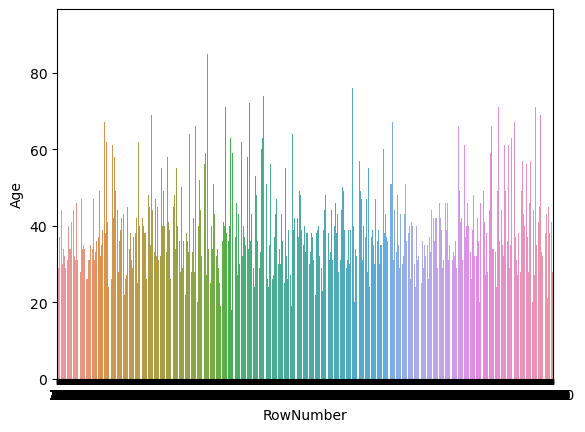

In [10]:
sns.barplot(x=df["RowNumber"],y=df["Age"])

In [9]:
#check data inconsistency
print(df.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [10]:
#check for catagorical data inconsistency
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")


Unique values in Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Unique values in Geography: ['France' 'Spain' 'Germany']
Unique values in Gender: ['Female' 'Male']


In [11]:
#since we dont need the row_id,name and customer_id for prediction we can drop these columns
df = df.drop(["RowNumber","CustomerId","Surname"],axis= 1)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
#the two categorical data can be mapped to an int
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Geography'] = df['Geography'].map({'France': 0, 'Spain': 1,'Germany':2})

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [15]:
#with the correlation_matrix we can visualize the relationships between the variables
correlation_matrix = df.corr()
correlation_matrix

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.008267,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.008267,1.000000,-0.016936,0.048092,0.001418,0.348700,-0.006180,0.004036,-0.012692,0.007382,0.153771
Gender,-0.002857,-0.016936,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.048092,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.001418,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.348700,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.006180,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,0.004036,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,-0.012692,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,0.007382,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


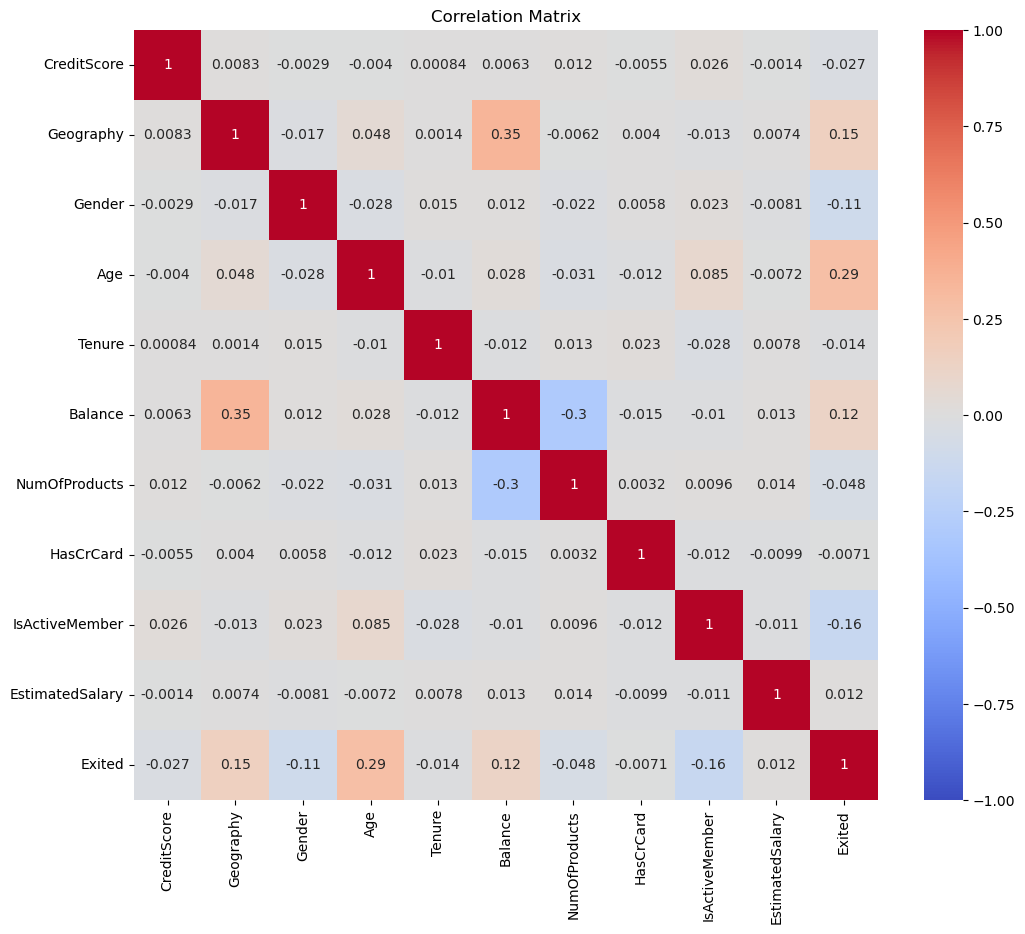

In [16]:
# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [17]:
df_x = df.iloc[:,:-1] #independent variables
df_y = df.iloc[:,-1] #target variable

In [18]:
#time to scale the dataset
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
df_scaled = Scaler.fit_transform(df_x)

In [19]:
#time to do dimentionality reduction
#its PCA timee
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_scaled)

# Calculate eigenvalues
eigenvalues = pca.explained_variance_
#we should probably retain components above 1 eigen values
# Number of components with eigenvalue > 1
n_components_kaiser = np.sum(eigenvalues > 1)
print(f"Number of components with eigenvalue > 1: {n_components_kaiser}")


Number of components with eigenvalue > 1: 5


In [20]:
eigenvalues

array([1.47455665, 1.10095367, 1.04100469, 1.01909454, 1.00757248,
       0.99648249, 0.97223143, 0.9608783 , 0.88955492, 0.53867094])

since there are 8 eigenvalues that are very close to 1 and more, we can reduce the dimensions to 8 components

In [21]:
# Apply PCA
pca = PCA(n_components=8)  #the number of components is 8
principal_components = pca.fit_transform(df_scaled)

# Convert the results into a DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['1', '2','3','4','4','6','7','8'])
print(pca_df)

             1         2         3         4         4         6         7  \
0     0.883979  1.090439 -0.294677 -0.699471  0.991166 -0.269785 -0.986778   
1    -0.747367  1.439766  0.368371 -1.993605  0.006964 -0.015383  0.077674   
2     0.736619 -1.083548  1.580830  0.404949  1.667516  0.699763  0.404346   
3     1.621489  0.371318  1.012845 -1.994235 -0.409273 -1.035163  0.415869   
4    -1.176975  1.423303  0.314245  0.380460 -0.604552 -1.768260 -0.920495   
...        ...       ...       ...       ...       ...       ...       ...   
9995  1.694349 -0.547560 -0.298324  0.731433 -0.784620 -0.590123 -0.373002   
9996  0.397264 -0.536659 -1.692439  0.874724  0.742295  1.626443  0.435102   
9997  0.962700  0.953584 -0.371147 -0.634511 -0.366521 -0.668313  1.793510   
9998 -0.480185 -0.282433  0.572370  0.902639 -0.767717 -0.957278 -0.762557   
9999 -0.405803 -0.981088 -0.296027 -0.236631 -0.190400 -2.327340 -0.107075   

             8  
0    -1.205137  
1    -0.163166  
2     0.5481

In [22]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")
print(f"Total explained variance: {sum(explained_variance)}")


Explained variance by each component: [0.14744092 0.11008436 0.10409006 0.10189926 0.10074717 0.09963828
 0.09721342 0.09607822]
Total explained variance: 0.8571916971547515


In [23]:
#addressing the class imbalance
df_y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In conclusion, I have a lot of people who stayed and very less people who churned

In [41]:
#we can handle the class imbalance using over sampling the minority
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(pca_df, df_y)


In [42]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

Train and prediction

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1)

In [44]:
#load the model
model_1 = SVC(kernel='linear')
#fit the model
model_1.fit(X_train,y_train)

SVC(kernel='linear')

In [46]:
# Make predictions on the test set
y_pred = model_1.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[1007  527]
 [ 579 1073]]
              precision    recall  f1-score   support

           0       0.63      0.66      0.65      1534
           1       0.67      0.65      0.66      1652

    accuracy                           0.65      3186
   macro avg       0.65      0.65      0.65      3186
weighted avg       0.65      0.65      0.65      3186

Accuracy: 0.6528562460765851


**We can see that the accuracy is very less when we perform PCA as the dataset is not that big, now we can compare when we do it without PCA**

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df_y, test_size=0.2, random_state=1)

In [48]:
#load the model
model_2 = SVC(kernel='linear')
#fit the model
model_2.fit(X_train,y_train)

SVC(kernel='linear')

In [49]:
# Make predictions on the test set
y_pred = model_2.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[1585    0]
 [ 415    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1585
           1       0.00      0.00      0.00       415

    accuracy                           0.79      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.79      0.70      2000

Accuracy: 0.7925


C:\Users\Aspire_Lays\anaconda3\envs\ai\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aspire_Lays\anaconda3\envs\ai\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aspire_Lays\anaconda3\envs\ai\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**As we can see PCA is not needed for this dataset**